### 1.Import neccessary Libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score

### 2.Import Train Data 

In [4]:
df=pd.read_csv("train.csv")

### 3.Check Shape of Data

In [6]:
print("Shape of data is :",df.shape)

Shape of data is : (42000, 785)


### 4.Select 10% of data from expt.

In [8]:
df1=df.sample(frac=0.1)

### 5.Print shape of Selected dataset

In [10]:
print(df1.shape)

(4200, 785)


### 6.Look at the top 5 rows

In [12]:
print(df1.head())

       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
26288      1       0       0       0       0       0       0       0       0   
6650       5       0       0       0       0       0       0       0       0   
20785      4       0       0       0       0       0       0       0       0   
6392       3       0       0       0       0       0       0       0       0   
2680       0       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
26288       0  ...         0         0         0         0         0   
6650        0  ...         0         0         0         0         0   
20785       0  ...         0         0         0         0         0   
6392        0  ...         0         0         0         0         0   
2680        0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
26288         0         0   

### 7.Find no.of unique class labels

In [14]:
print(df1['label'].nunique())

10


### 8.Print the no of examples for each class label 

In [16]:
print(df1['label'].value_counts())

label
1    482
2    429
7    426
6    425
3    425
0    416
4    415
9    398
8    396
5    388
Name: count, dtype: int64


### 9.Prepare X and Y

In [18]:
X = df1.drop(columns=['label']) 
Y = df1['label']

### 10.Visualization the image of first 5 digital in X-also print the class label in 

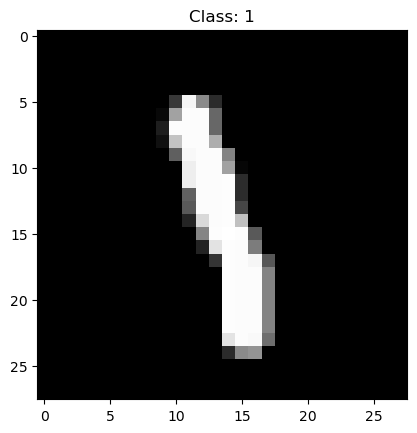

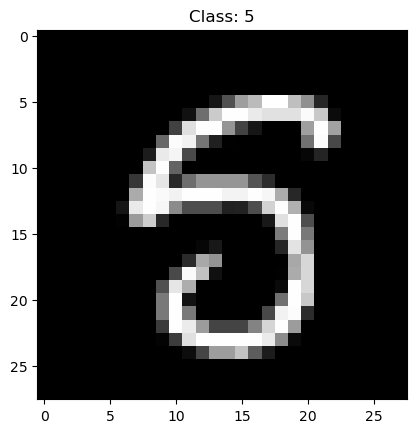

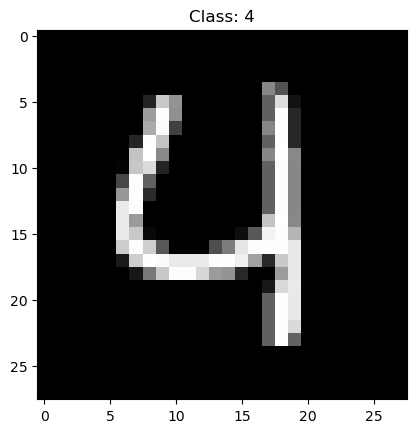

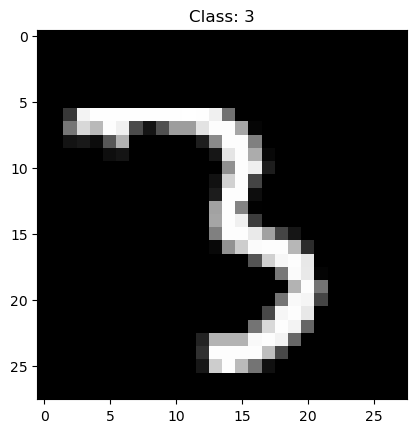

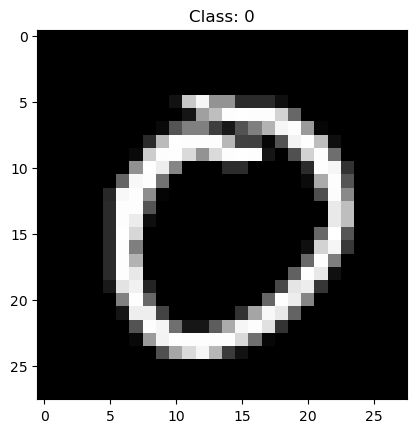

In [20]:
# Assuming dataset contains image data in pixel values
for i in range(5):
    plt.imshow(X.iloc[i].values.reshape(28, 28), cmap='gray')  # Change shape accordingly
    plt.title(f"Class: {Y.iloc[i]}")
    plt.show()

### 11.split train dataset into training(75%) & validation set(25%)

In [22]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.75, random_state=42)

### 12.Fit KNN Classifies to training data
### 13.Default parameters n-neighbors-5,metric='minkowski' p=2

In [24]:
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)  # Default parameters
knn.fit(X_train, Y_train)

KNeighborsClassifier()

### 14.predict the validation set results

In [26]:
Y_pred = knn.predict(X_validation)

### 15.print confusion matrix 

In [28]:
conf_matrix = confusion_matrix(Y_validation, Y_pred)
print(conf_matrix)


[[298   0   2   1   0   1   4   0   1   0]
 [  0 363   0   0   1   0   0   0   0   0]
 [ 17  21 275   2   4   0   0   3   4   1]
 [  2   8   7 262   1  16   3   1   9   4]
 [  1   6   0   0 271   0   6   2   0  30]
 [  5  13   0  15   2 238   5   1   0   4]
 [  1   5   0   0   0   1 303   0   0   0]
 [  2  15   1   0   4   0   0 306   0   9]
 [  3  12   3  15   2  21   6   4 225   4]
 [  0   5   0   2  12   1   0  14   1 263]]


In [30]:
from sklearn.metrics import ConfusionMatrixDisplay


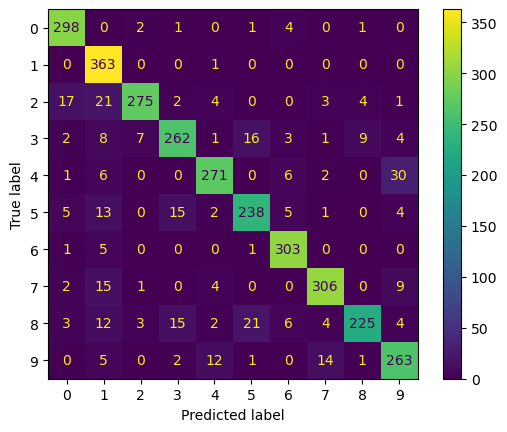

In [32]:
ConfusionMatrixDisplay.from_predictions(Y_validation, Y_pred, cmap='viridis')

### 16.printing classification report and accuracy

In [35]:
print(classification_report(Y_validation, Y_pred))
print(f"Accuracy: {accuracy_score(Y_validation, Y_pred) * 100:.2f}%")

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       307
           1       0.81      1.00      0.89       364
           2       0.95      0.84      0.89       327
           3       0.88      0.84      0.86       313
           4       0.91      0.86      0.88       316
           5       0.86      0.84      0.85       283
           6       0.93      0.98      0.95       310
           7       0.92      0.91      0.92       337
           8       0.94      0.76      0.84       295
           9       0.83      0.88      0.86       298

    accuracy                           0.89      3150
   macro avg       0.89      0.89      0.89      3150
weighted avg       0.89      0.89      0.89      3150

Accuracy: 89.02%


### 17.Visualize the image of first 5 digits in X-test also print the predicted

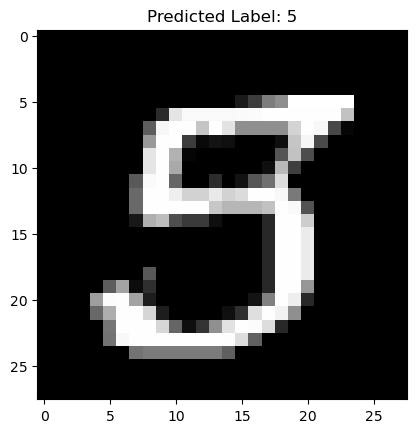

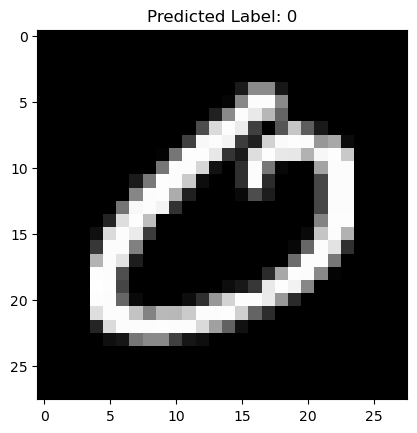

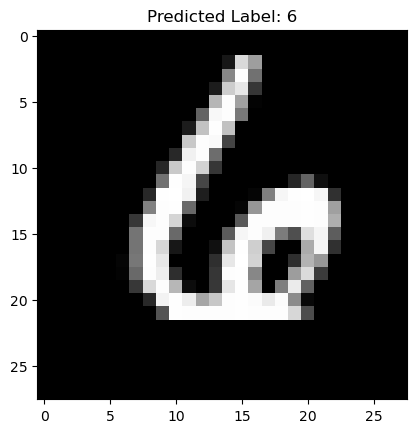

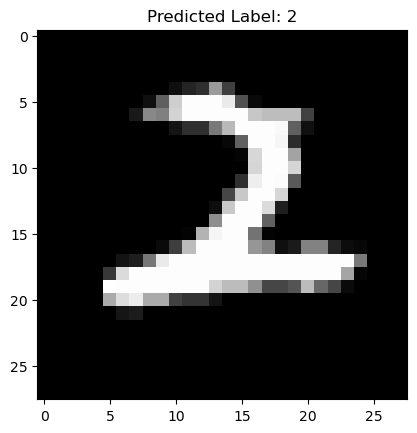

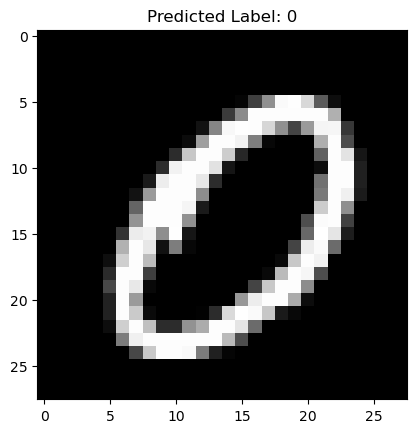

In [37]:
for i in range(5):
    plt.imshow(X_validation.iloc[i].values.reshape(28, 28), cmap='gray')  # Change shape if needed
    plt.title(f"Predicted Label: {Y_pred[i]}")
    plt.show()


4


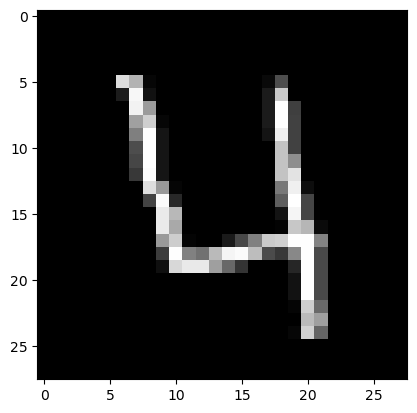

In [39]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df.head()
df.shape
df.info
df.head(1)
#to convert into image
plt.imshow(df.iloc[3, 1:].values.reshape(28, 28), cmap='grey')
print(df.iloc[3, 0])
#take only 10% of total data since applying knn
mf = df.sample(frac=0.10)
y = mf.iloc[:, 0]
X = mf.iloc[:, 1:]